In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def folder_images(path):
    images = []
    for filename in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
path= '/content/drive/MyDrive/dump'
original_images = folder_images(path)
print('number of images : ',len(original_images))
print('resolution of images : ',original_images[0].shape)

100%|██████████| 322/322 [00:08<00:00, 38.42it/s]

number of images :  322
resolution of images :  (1024, 1024, 3)


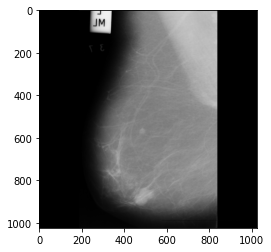

In [ ]:
plt.imshow(original_images[0])

In [ ]:
def original_gray(original):  #function to convert images from bgr to grayscale
    gray_img = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
    return gray_img

In [ ]:
gray_images = [] #oringinal/base mammogram images 
for img in tqdm(original_images): 
    gray_images.append(original_gray(img))

100%|██████████| 322/322 [00:00<00:00, 761.08it/s]


In [ ]:
print(len(gray_images),gray_images[0].shape)

322 (1024, 1024)


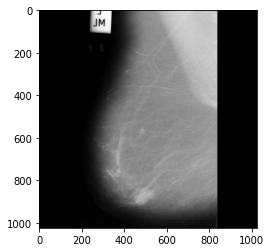

In [ ]:
plt.imshow(gray_images[0], cmap='gray')

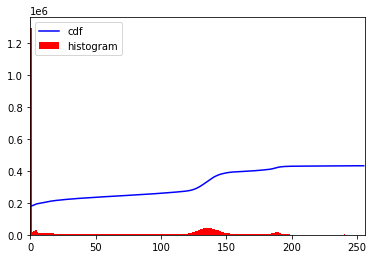

In [ ]:
hist,bins = np.histogram(gray_images[0].flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(original_images[0].flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
def hist_equ(gray):
    hist_img = cv2.equalizeHist(gray)
    return hist_img

100%|██████████| 322/322 [00:02<00:00, 155.58it/s]


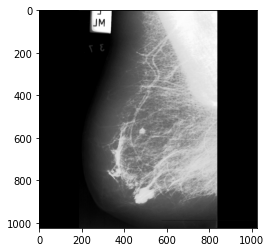

In [ ]:
hist_images = []
for img in tqdm(gray_images):
    hist_images.append(hist_equ(img))
plt.imshow(hist_images[0],cmap='gray')    

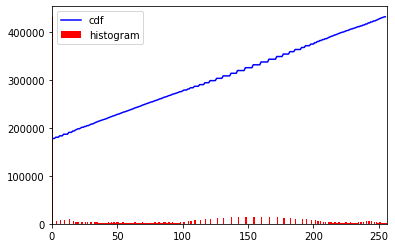

In [ ]:
hist,bins = np.histogram(hist_images[0].flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(hist_images[0].flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
#median blurred images
def median_blur(denoise):
    denoise = cv2.medianBlur(denoise,9)
    return denoise

In [ ]:
median_images = []
for img in tqdm(hist_images): 
    median_images.append(median_blur(img))

100%|██████████| 322/322 [00:15<00:00, 20.39it/s]


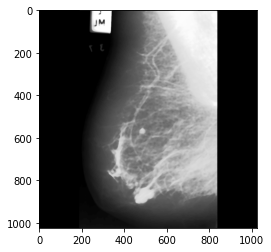

In [ ]:
plt.imshow(median_images[0],cmap='gray')

In [ ]:
'''median_images1 = []
for img in tqdm(gray_images): 
    median_images1.append(median_blur(img))'''

'median_images1 = []\nfor img in tqdm(gray_images): \n    median_images1.append(median_blur(img))'

In [ ]:
#plt.imshow(median_images1[0],cmap='gray')

In [ ]:
#Prewitt 

def prewitt1(gray_img):
    
    
    h, w = gray_img.shape
# define filters
    horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
    vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

# define images with 0s
    newgradientImage = np.zeros((h, w))

# offset by 1
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                             (horizontal[0, 1] * gray_img[i - 1, j]) + \
                             (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                             (horizontal[1, 0] * gray_img[i, j - 1]) + \
                             (horizontal[1, 1] * gray_img[i, j]) + \
                             (horizontal[1, 2] * gray_img[i, j + 1]) + \
                             (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                             (horizontal[2, 1] * gray_img[i + 1, j]) + \
                             (horizontal[2, 2] * gray_img[i + 1, j + 1])

            verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                           (vertical[0, 1] * gray_img[i - 1, j]) + \
                           (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                           (vertical[1, 0] * gray_img[i, j - 1]) + \
                           (vertical[1, 1] * gray_img[i, j]) + \
                           (vertical[1, 2] * gray_img[i, j + 1]) + \
                           (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                           (vertical[2, 1] * gray_img[i + 1, j]) + \
                           (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
            mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
            newgradientImage[i - 1, j - 1] = mag
    return newgradientImage

In [ ]:
from skimage.filters import roberts,prewitt,sobel,scharr

In [ ]:
prewitt_images=[]
for i,img in enumerate(tqdm(median_images)):
    prewitt_images.append(prewitt1(img))

100%|██████████| 322/322 [1:35:48<00:00, 17.85s/it]


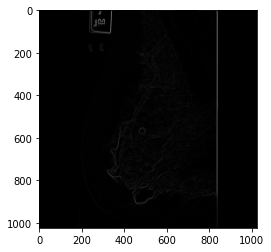

In [ ]:
plt.imshow(prewitt_images[0],cmap='gray')

In [ ]:
#Roberts
roberts_cross_v = np.array( [[ 0, 0, 0 ],
                             [ 0, 1, 0 ],
                             [ 0, 0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 0, 0 ],
                             [ 0, 0, 1 ],
                             [ 0,-1, 0 ]] )

In [ ]:
'''from scipy import ndimage
def roberts_cross(image):
    vertical = ndimage.convolve( image, roberts_cross_v )
    horizontal = ndimage.convolve( image, roberts_cross_h )

    output_image = np.sqrt( np.square(horizontal) + np.square(vertical))
    
    

    return output_image
    '''

'from scipy import ndimage\ndef roberts_cross(image):\n    vertical = ndimage.convolve( image, roberts_cross_v )\n    horizontal = ndimage.convolve( image, roberts_cross_h )\n\n    output_image = np.sqrt( np.square(horizontal) + np.square(vertical))\n    \n    \n\n    return output_image\n    '

In [ ]:
from skimage.filters import roberts,prewitt,sobel,scharr

In [ ]:
robert_images=[]
for img in tqdm(median_images):
    robert_images.append(roberts(img))

100%|██████████| 322/322 [00:13<00:00, 24.63it/s]


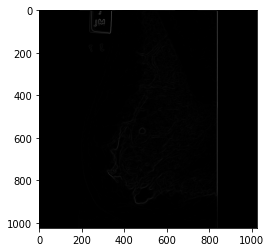

In [ ]:
plt.imshow(robert_images[0],cmap='gray')

In [ ]:
def canny(image):
    canny_image = cv2.Canny(image,20,75) #upper and lower thresholds (not an edge, edge)
    return canny_image

In [ ]:
canny_images = []
for img in tqdm(median_images):
    canny_images.append(canny(img))

100%|██████████| 322/322 [00:01<00:00, 184.75it/s]


100%|██████████| 322/322 [00:03<00:00, 102.13it/s]


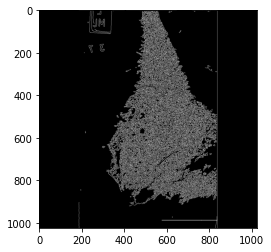

In [ ]:
'''canny_images1 = []
for img in tqdm(hist_images):
    canny_images1.append(canny(img))
plt.imshow(canny_images1[0],cmap='gray')'''

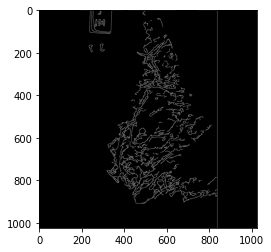

In [ ]:
plt.imshow(canny_images[0],cmap='gray')

In [ ]:
def sobel_filter(image):
    sobelx = cv2.Sobel(image,cv2.CV_16S,1,0,ksize=3) # x axis
    sobelx_16S = np.absolute(sobelx) #convert to 16 bit signed 
    sobelx_8U = np.uint8(sobelx_16S) #convert to 16 bit unsigned
    
    sobely = cv2.Sobel(image,cv2.CV_16S,0,1,ksize=3) # x axis
    sobely_16S = np.absolute(sobely) #convert to 16 bit signed 
    sobely_8U = np.uint8(sobely_16S) #convert to 16 bit unsigned
    
    sobelxy = np.sqrt(sobely_8U**2 + sobelx_8U**2) #or sobelxy = np.sqrt(sobely**2 + sobelx**2) \n sobelxy=np.unit8(sobelxy)
    
    return sobelxy


In [ ]:

sobel_images = []
for img in tqdm(median_images):
    sobel_images.append(sobel(img))
  

100%|██████████| 322/322 [00:15<00:00, 20.39it/s]


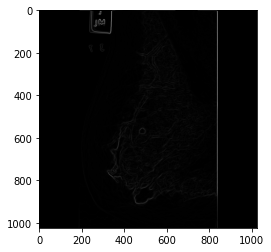

In [ ]:
plt.imshow(sobel_images[0],cmap='gray')  

In [ ]:
psnr_val=0

In [ ]:


from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  

        

In [ ]:
robert_psnr=[]
for i,img in enumerate(robert_images):
    value=PSNR(img,gray_images[i])
    robert_psnr.append(value)



In [ ]:
prewitt_psnr=[]
for i,img in enumerate(prewitt_images):
    value=PSNR(img,gray_images[i])
    prewitt_psnr.append(value)



In [ ]:
canny_psnr=[]
for i,img in enumerate(canny_images):
    value=PSNR(img,gray_images[i])
    canny_psnr.append(value)

 

In [ ]:
sobel_psnr=[]
for i,img in enumerate(sobel_images):
    value=PSNR(img,gray_images[i])
    sobel_psnr.append(value)
    

In [ ]:
for i in range(len(robert_psnr)):
    print(robert_psnr[i],sobel_psnr[i],canny_psnr[i])

8.574743264186317 8.574908687780287 31.117714222509942
8.536990349351854 8.537057507238092 32.10566825421217
9.229147304471093 9.229307411261416 31.374709063083085
8.04341491022823 8.043681730928132 30.35137718647039
7.969623178556144 7.969775336774748 31.360540560008904
8.418629330268123 8.41887515490637 30.945340637106383
9.472960910856274 9.473140158699806 31.657106781541323
10.842054910311091 10.842175922811625 32.4293331934232
7.841159983602056 7.841303336841553 30.8665681675685
10.048043037322156 10.048258242487588 32.82884393925565
8.920550934923847 8.92068598282428 31.863486594572528
9.890785848678224 9.891012053584703 32.20316851700824
10.156749239786754 10.157013534108458 32.71237134107236
8.978523677486503 8.978708470085808 31.360134039461766
8.039453569600335 8.039632154390468 31.12070956158369
9.401165116170738 9.401299301803213 31.574184672557347
9.097743183748362 9.09788080915539 30.75437778967406
9.817261968083413 9.817438483346042 32.15846761448605
8.28475695219447 8.2

In [ ]:
prewitt_images1 = []

for img in tqdm(prewitt_images):
    prewitt_images1.append(np.uint8(img))

100%|██████████| 322/322 [00:01<00:00, 297.22it/s]


In [ ]:
prewitt_canny_images=[]
for img in tqdm(prewitt_images1):
    
    prewitt_canny_images.append(canny(img))

 96%|█████████▌| 308/322 [00:02<00:00, 111.26it/s]

In [ ]:
plt.imshow(prewitt_canny_images[0],cmap='gray')

In [ ]:
prewitt_canny_psnr=[]
for i,img in enumerate(prewitt_canny_images):
    value=PSNR(img,gray_images[i])
    prewitt_canny_psnr.append(value)

In [ ]:
for i in range(len(prewitt_canny_psnr)):
    print(prewitt_canny_psnr[i], canny_psnr[i], prewitt_psnr[i])

In [ ]:
#gaussiam blurred images


def gaussian_blur(denoise):
    denoise = cv2.GaussianBlur(denoise,(5,5),0)
    return denoise



In [ ]:
gaussian_images = []
for img in hist_images: 
    gaussian_images.append(gaussian_blur(img))
plt.imshow(gaussian_images[0],cmap='gray')    

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1), plt.imshow(gaussian_images[0],cmap='gray')
plt.title('Gaussian blur'), plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2), plt.imshow(median_images[0],cmap='gray')
plt.title('Median blur'), plt.xticks([]),plt.yticks([])


In [ ]:
canny_images2 = []
for img in tqdm(gaussian_images):
    canny_images2.append(canny(img))
plt.imshow(canny_images2[0],cmap='gray')    

In [ ]:
median_images1 = []
for img in gray_images: 
    median_images1.append(median_blur(img))
plt.imshow(median_images1[0],cmap='gray')    

In [ ]:
hist_images1 = []
for img in median_images1:
    hist_images1.append(hist_equ(img))
plt.imshow(hist_images1[0],cmap='gray')    

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1), plt.imshow(hist_images[0],cmap='gray')
plt.title('Histogram eq on gray'), plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2), plt.imshow(hist_images1[0],cmap='gray')
plt.title('Hist eq on median blur'), plt.xticks([]),plt.yticks([])

plt.subplot(2,2,3), plt.imshow(median_images[0],cmap='gray')
plt.title('Median blur on hist'), plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4), plt.imshow(median_images1[0],cmap='gray')
plt.title('Median 1 blur on gray'), plt.xticks([]),plt.yticks([])





In [ ]:
canny_images3 = []
for img in tqdm(hist_images1):
    canny_images3.append(canny(img))
plt.imshow(canny_images3[0],cmap='gray')    

In [ ]:
canny_psnr1=[]
for i,img in enumerate(canny_images3):
    value=PSNR(img,gray_images[i])
    canny_psnr1.append(value)
    

In [ ]:
for i in range(len(prewitt_canny_psnr)):
    print(prewitt_canny_psnr[i], canny_psnr1[i], canny_psnr[i])

In [ ]:
robert_images1=[]
for img in tqdm(hist_images1):
    robert_images1.append(roberts(img))
plt.imshow(robert_images[0],cmap='gray')  

"robert_images1=[]\nfor img in tqdm(hist_images1):\n    robert_images1.append(roberts(img))\nplt.imshow(robert_images[0],cmap='gray')  "

In [ ]:
robert_canny_images = []

for img in tqdm(canny_images3):
    robert_canny_images.append(roberts(img))

plt.imshow(robert_canny_images[0],cmap='gray')    


In [ ]:
robert_canny_psnr=[]
for i,img in enumerate(robert_canny_images):
    value=PSNR(img,gray_images[i])
    robert_canny_psnr.append(value)
    

In [ ]:
for i in range(len(prewitt_canny_psnr)):
    print(prewitt_canny_psnr[i], robert_canny_psnr[i], canny_psnr1[i], canny_psnr[i])

32.402039790642434 10.842841976364808 32.43000711757526 32.42537901964271
31.354094384072916 9.229934960603446 31.374769553149655 31.370323855403633
32.057704153440156 8.537466964202302 32.10567456380033 32.08647261156373
31.334230976059484 7.970315338203035 31.360598064915703 31.34245111669472
31.092742176593056 8.579321046700002 31.11410859513294 31.083785270886693
30.332150978596225 8.050986943708711 30.350957928791527 30.334678821799223
31.633424216350136 9.476808575262432 31.658935938037473 31.64975072695935
30.92869387212382 8.423437605994003 30.944607454036714 30.931599248957234
31.314499384467656 8.980268329467854 31.36254261455008 31.348995070822674
32.189039078796576 9.894588987975306 32.2037522735662 32.203878598740914
31.514977019914888 9.405348562796535 31.572135535014244 31.534870857611573
30.839853112548703 7.8423409686128 30.866510935979147 30.853248898896567
31.85514636358682 8.922272436815081 31.862862805268474 31.86804257134409
31.11840742642693 8.041098951514966 31.

In [ ]:
mdb=1

for img in canny_images:
    image=cv2.imwrite(r"/content/drive/MyDrive/preprocessed_dump/P_{}.png".format(mdb),img)
    mdb=mdb+1

(256, 146, 3)

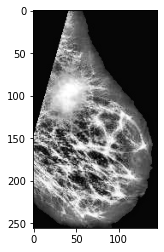

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/0.jpg")
plt.imshow(image,cmap='gray')


old_image_h, old_image_w, channels = image.shape
image.shape

In [ ]:
new_image_h = 256
new_image_w = 256
colour = (0,0,0)
result_image = np.full((new_image_h,new_image_w,channels),colour,dtype=np.uint8)

In [ ]:
#center offset

x_center = (new_image_w - old_image_w) // 2
y_center = (new_image_h - old_image_h) // 2

In [ ]:
#copy image into center of resultant image

result_image[y_center:y_center + old_image_h, x_center:x_center + old_image_w] = image 

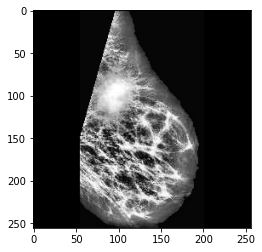

In [ ]:
plt.imshow(result_image,cmap='gray')

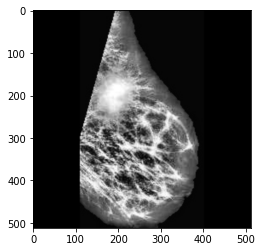

In [ ]:
resized = cv2.resize(result_image, (512, 512))
plt.imshow(resized,cmap='gray')

In [1]:
from skimage import io
from skimage import color
from skimage.filters import median
from skimage.morphology import disk
from skimage import exposure
import cv2



100%|██████████| 48/48 [00:07<00:00,  6.27it/s]


number of images :  48
resolution of images :  (256, 146, 3)


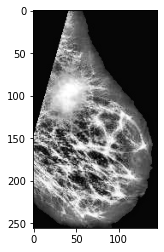

In [5]:
def folder_images(path):
    images = []
    for filename in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path,filename))
        if img is not None:
            images.append(img)
    return images

path= '/content/drive/MyDrive/unpadded/malignant_cases'
original_images = folder_images(path)
plt.imshow(original_images[0],cmap='gray')
print('number of images : ',len(original_images))
print('resolution of images : ',original_images[0].shape)


In [6]:
padded_images = []
def padding(filename):
  image = io.imread(filename)
  image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
  #print(image.shape)
  old_image_h, old_image_w, channels = image.shape
  new_image_h = 256
  new_image_w = 256
  colour = (0,0,0)
  result_image = np.full((new_image_h,new_image_w,channels),colour,dtype=np.uint8)
  
  #center offset
  x_center = (new_image_w - old_image_w) // 2
  y_center = (new_image_h - old_image_h) // 2

  #copy image into center of resultant image
  result_image[y_center:y_center + old_image_h, x_center:x_center + old_image_w] = image  

  #resize image to 256x256
  resized = cv2.resize(result_image, (256, 256))


  padded_images.append(resized)

  return resized

In [7]:
from skimage.io import imsave, imread

images_directory = '/content/drive/MyDrive/unpadded/malignant_cases'
pec_padded = '/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases'
for root, directory, file in os.walk(images_directory):
  for f in file:
    
      pec_padded_img = padding(root + '/' + f)
      padding(root + '/' + f)
      pec_padded_img_path = pec_padded + '/' + f
      #cv2.imwrite(pec_removed_img_path,255*pec_removed_img)
      imsave(pec_padded_img_path,pec_padded_img)
      print(pec_padded_img_path)
  

/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/0.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/1.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/2.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/3.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/4.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/5.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/6.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/7.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/8.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/9.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/10.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/11.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/12.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/13.jpg
/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cas

In [8]:
image = cv2.imread('/content/drive/MyDrive/Pec_removed_mini_mias/malignant_cases/0.jpg')
image.shape

(256, 256, 3)

In [ ]:

i=0
for img in tqdm(cropped_images):
    image = cv2.imwrite('/content/drive/MyDrive/cropped_mini_mias/cropped_normal_resized/{}.jpg'.format(i),img) 
    i=i+1